In [435]:
#Loading all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline
pd.pandas.set_option('display.max_columns', None)

In [436]:
#Loading Data
movie_data = pd.read_csv("C:\\Users\\tuhin\\OneDrive\\Desktop\\Datasets\\TalentEdgeRC_Technical_Interview\\Data.csv")

In [440]:
#Get glipse of Data
movie_data.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres1,genres2,genres3,genres3.1,genres4,production_companies1,production_companies2,Unnamed: 28,Unnamed: 29,Unnamed: 30
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09,Action,Adventure,Science Fiction,Thriller,NaN,Universal Studios,Amblin Entertainment,Legendary Pictures,Fuji Television Network,Dentsu
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08,Action,Adventure,Science Fiction,Thriller,NaN,Village Roadshow Pictures,Kennedy Miller Productions,NaN,NaN,NaN
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08,Adventure,Science Fiction,Thriller,NaN,NaN,Summit Entertainment,Mandeville Films,Red Wagon Entertainment,NeoReel,NaN
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09,Action,Adventure,Science Fiction,Fantasy,NaN,Lucasfilm,Truenorth Productions,Bad Robot,NaN,NaN
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09,Action,Crime,Thriller,NaN,NaN,Universal Pictures,Original Film,Media Rights Capital,Dentsu,One Race Films


In [441]:
#Get column types
print(movie_data.dtypes)

#Add line in output
print("\n")

#Get statistical details of Data
print(movie_data.describe())

id                         int64
imdb_id                   object
popularity               float64
budget                     int64
revenue                    int64
original_title            object
cast                      object
homepage                  object
director                  object
tagline                   object
keywords                  object
overview                  object
runtime                    int64
genres                    object
production_companies      object
release_date              object
vote_count                 int64
vote_average             float64
release_year               int64
budget_adj               float64
revenue_adj              float64
genres1                   object
genres2                   object
genres3                   object
genres3.1                 object
genres4                   object
production_companies1     object
production_companies2     object
Unnamed: 28               object
Unnamed: 29               object
Unnamed: 3

In [442]:
#Get all column names
movie_data.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj', 'genres1', 'genres2', 'genres3', 'genres3.1', 'genres4',
       'production_companies1', 'production_companies2', 'Unnamed: 28',
       'Unnamed: 29', 'Unnamed: 30'],
      dtype='object')

In [443]:
#It is evident from the dataset that genre and production_companies have extended columns. Hence removing those columns.
movie_data = movie_data.drop(['genres1', 'genres2', 'genres3', 'genres3.1', 'genres4',
       'production_companies1', 'production_companies2', 'Unnamed: 28',
       'Unnamed: 29', 'Unnamed: 30'], axis=1)

In [444]:
#Changing the release_date column into Date type for further analysis
movie_data['release_date']= pd.to_datetime(movie_data['release_date'])
#Verify the column datatypes
movie_data.dtypes

id                               int64
imdb_id                         object
popularity                     float64
budget                           int64
revenue                          int64
original_title                  object
cast                            object
homepage                        object
director                        object
tagline                         object
keywords                        object
overview                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
budget_adj                     float64
revenue_adj                    float64
dtype: object

In [445]:
#Get column wise NA values
movie_data.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2823
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [405]:
#It is evident that NA values are only in Categorical variables hence replacing the values with "Not mentioned".
movie_data.fillna("Not mentioned", inplace = True)

#Check the column wise NA value count
print(movie_data.isna().sum())

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
homepage                0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64


In [224]:
#Extract weekday from Release Date column and create a new column
movie_data["release_day"] = movie_data["release_date"].dt.strftime("%A")

In [225]:
#Create a new column extracting month from Release Date column
movie_data["release_month"] = movie_data["release_date"].dt.strftime("%B")

In [406]:
#Get a glimpse of data after modification
movie_data.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,174799923.1,1.385749e+09


In [407]:
#Splitting Genre column using delimiter
genre_split = movie_data["genres"].str.split("|", expand = True) 
genre_split.head()

,0,1,2,3,4
0,Action,Adventure,Science Fiction,Thriller,None
1,Action,Adventure,Science Fiction,Thriller,None
2,Adventure,Science Fiction,Thriller,None,None
3,Action,Adventure,Science Fiction,Fantasy,None
4,Action,Crime,Thriller,None,None


In [408]:
#Creating column types for genre types
movie_data["Genre type_1"]= genre_split[0]
movie_data["Genre type_2"]= genre_split[1]
movie_data["Genre type_3"]= genre_split[2]
movie_data["Genre type_4"]= genre_split[3]
movie_data["Genre type_5"]= genre_split[4]
movie_data.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,Genre type_1,Genre type_2,Genre type_3,Genre type_4,Genre type_5
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,137999939.3,1.392446e+09,Action,Adventure,Science Fiction,Thriller,None
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,137999939.3,3.481613e+08,Action,Adventure,Science Fiction,Thriller,None
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,101199955.5,2.716190e+08,Adventure,Science Fiction,Thriller,None,None
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,183999919.0,1.902723e+09,Action,Adventure,Science Fiction,Fantasy,None
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,174799923.1,1.385749e+09,Action,Crime,Thriller,None,None


In [409]:
##Splitting Production Companies column using delimiter and creating new columns
production_split = movie_data["production_companies"].str.split("|", expand = True)
movie_data["Production company_1"]= production_split[0]
movie_data["Production company_2"]= production_split[1]
movie_data["Production company_3"]= production_split[2]
movie_data["Production company_4"]= production_split[3]
movie_data.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,Genre type_1,Genre type_2,Genre type_3,Genre type_4,Genre type_5,Production company_1,Production company_2,Production company_3,Production company_4
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,137999939.3,1.392446e+09,Action,Adventure,Science Fiction,Thriller,None,Universal Studios,Amblin Entertainment,Legendary Pictures,Fuji Television Network
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,137999939.3,3.481613e+08,Action,Adventure,Science Fiction,Thriller,None,Village Roadshow Pictures,Kennedy Miller Productions,None,None
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,101199955.5,2.716190e+08,Adventure,Science Fiction,Thriller,None,None,Summit Entertainment,Mandeville Films,Red Wagon Entertainment,NeoReel
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,183999919.0,1.902723e+09,Action,Adventure,Science Fiction,Fantasy,None,Lucasfilm,Truenorth Productions,Bad Robot,None
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,174799923.1,1.385749e+09,Action,Crime,Thriller,None,None,Universal Pictures,Original Film,Media Rights Capital,Dentsu


In [429]:
#Removing less important columns
movie_data.drop(["genres","production_companies","id","imdb_id"],axis=1,inplace=True)

In [410]:
#Check duplicate values
movie_data[movie_data.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,Genre type_1,Genre type_2,Genre type_3,Genre type_4,Genre type_5,Production company_1,Production company_2,Production company_3,Production company_4
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Not mentioned,Dwight H. Little,Survival is no game,martial arts|dystopia|based on video game|mart...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,2010-03-20,110,5.0,2010,30000000.0,967000.0,Crime,Drama,Action,Thriller,Science Fiction,Namco,Light Song Films,None,None


In [233]:
#Check the columns having duplicate values
movie_data.iloc[2089:2091]

,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_day,release_month,Genre type_1,Genre type_2,Genre type_3,Genre type_4,Genre type_5,Production company_1,Production company_2,Production company_3,Production company_4
2089,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Not mentioned,Dwight H. Little,Survival is no game,martial arts|dystopia|based on video game|mart...,"In the year of 2039, after World Wars destroy ...",92,2010-03-20,110,5.0,2010,30000000.0,967000.0,Saturday,March,Crime,Drama,Action,Thriller,Science Fiction,Namco,Light Song Films,None,None
2090,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Not mentioned,Dwight H. Little,Survival is no game,martial arts|dystopia|based on video game|mart...,"In the year of 2039, after World Wars destroy ...",92,2010-03-20,110,5.0,2010,30000000.0,967000.0,Saturday,March,Crime,Drama,Action,Thriller,Science Fiction,Namco,Light Song Films,None,None


In [412]:
#Dropping the duplicate rows
movie_data.drop(index=2090,axis=0,inplace=True)

In [413]:
#Verify duplicate values after cleansing
movie_data[movie_data.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,Genre type_1,Genre type_2,Genre type_3,Genre type_4,Genre type_5,Production company_1,Production company_2,Production company_3,Production company_4


In [414]:
#Get the top revenue generating Production companies 
print(movie_data.groupby("Production company_1")["revenue_adj"].sum().sort_values(ascending=False).iloc[:5])
print('\n')
print(movie_data.groupby("Production company_2")["revenue_adj"].sum().sort_values(ascending=False).iloc[:5])
print('\n')
print(movie_data.groupby("Production company_3")["revenue_adj"].sum().sort_values(ascending=False).iloc[:5])
print('\n')
print(movie_data.groupby("Production company_4")["revenue_adj"].sum().sort_values(ascending=False).iloc[:5])

Production company_1
Paramount Pictures                        5.420481e+10
Universal Pictures                        5.409979e+10
Walt Disney Pictures                      3.738639e+10
Columbia Pictures                         3.290144e+10
Twentieth Century Fox Film Corporation    3.280394e+10
Name: revenue_adj, dtype: float64


Production company_2
Warner Bros.                              2.495978e+10
Twentieth Century Fox Film Corporation    1.755687e+10
Amblin Entertainment                      1.310553e+10
Pixar Animation Studios                   1.041748e+10
Metro-Goldwyn-Mayer (MGM)                 9.654813e+09
Name: revenue_adj, dtype: float64


Production company_3
Warner Bros.                 1.628107e+10
Dune Entertainment           5.459884e+09
Heyday Films                 5.437522e+09
Relativity Media             4.744468e+09
Metro-Goldwyn-Mayer (MGM)    3.783959e+09
Name: revenue_adj, dtype: float64


Production company_4
Warner Bros.                8.751613e+09
Relativ

In [415]:
#Get the top revenue generating Genres
print(movie_data.groupby("Genre type_1")["revenue_adj"].sum().sort_values(ascending=False).iloc[:5])
print('\n')
print(movie_data.groupby("Genre type_2")["revenue_adj"].sum().sort_values(ascending=False).iloc[:5])
print('\n')
print(movie_data.groupby("Genre type_3")["revenue_adj"].sum().sort_values(ascending=False).iloc[:5])
print('\n')
print(movie_data.groupby("Genre type_4")["revenue_adj"].sum().sort_values(ascending=False).iloc[:5])
print('\n')
print(movie_data.groupby("Genre type_5")["revenue_adj"].sum().sort_values(ascending=False).iloc[:5])

Genre type_1
Action       1.176760e+11
Adventure    9.758987e+10
Comedy       8.899779e+10
Drama        8.778361e+10
Animation    3.091591e+10
Name: revenue_adj, dtype: float64


Genre type_2
Adventure    6.753253e+10
Action       6.680966e+10
Drama        6.503248e+10
Comedy       4.828166e+10
Thriller     4.498556e+10
Name: revenue_adj, dtype: float64


Genre type_3
Thriller           6.171780e+10
Science Fiction    3.912452e+10
Family             3.688173e+10
Drama              3.326261e+10
Adventure          3.139564e+10
Name: revenue_adj, dtype: float64


Genre type_4
Thriller           3.194854e+10
Science Fiction    2.438029e+10
Family             2.069201e+10
Fantasy            1.291582e+10
Romance            1.180405e+10
Name: revenue_adj, dtype: float64


Genre type_5
Thriller           6.858896e+09
Family             6.302436e+09
Fantasy            6.243937e+09
Science Fiction    5.379043e+09
Romance            4.001760e+09
Name: revenue_adj, dtype: float64


In [240]:
#Get the revenue generation by months in descending order
print(movie_data.groupby("release_month")["revenue_adj"].sum().sort_values(ascending=False))

release_month
December     8.349306e+10
June         8.071322e+10
May          6.168336e+10
July         5.856037e+10
November     5.849808e+10
March        4.069192e+10
October      3.844519e+10
August       3.255990e+10
April        3.165386e+10
September    3.095786e+10
February     2.345234e+10
January      1.741505e+10
Name: revenue_adj, dtype: float64


In [241]:
#Get the revenue generation by release day in descending order
print(movie_data.groupby("release_day")["revenue_adj"].sum().sort_values(ascending=False))

release_day
Friday       1.749253e+11
Wednesday    1.324655e+11
Thursday     1.212345e+11
Tuesday      6.000533e+10
Monday       3.190747e+10
Sunday       2.094338e+10
Saturday     1.664272e+10
Name: revenue_adj, dtype: float64


In [242]:
#Get the Average vote count by release months in descending order
print(movie_data.groupby("release_month")["vote_average"].mean().sort_values(ascending=False))

release_month
December     6.189442
September    6.068069
November     6.062654
June         6.012092
May          5.967985
October      5.959844
July         5.928411
March        5.928102
February     5.918524
April        5.875533
January      5.870620
August       5.840087
Name: vote_average, dtype: float64


In [243]:
#Get the Average vote count by release days in descending order
print(movie_data.groupby("release_day")["vote_average"].mean().sort_values(ascending=False))

release_day
Wednesday    6.128272
Sunday       6.089270
Thursday     6.016311
Monday       5.978971
Saturday     5.930977
Friday       5.921644
Tuesday      5.858238
Name: vote_average, dtype: float64


In [244]:
#Get the Popularity by release months and days in descending order
print(movie_data.groupby("release_month")["popularity"].mean().sort_values(ascending=False))
print('\n')
print(movie_data.groupby("release_day")["popularity"].mean().sort_values(ascending=False))

release_month
June         0.800755
November     0.755466
December     0.750784
May          0.749997
July         0.747678
March        0.642808
October      0.613168
February     0.589931
August       0.584363
September    0.564820
April        0.562475
January      0.460574
Name: popularity, dtype: float64


release_day
Wednesday    0.878952
Thursday     0.803214
Tuesday      0.633115
Monday       0.596432
Friday       0.570176
Sunday       0.473438
Saturday     0.463704
Name: popularity, dtype: float64


In [245]:
#Get the top 5 revenue generating Director
print(movie_data.groupby("director")["revenue_adj"].sum().sort_values(ascending=False).iloc[:5])

director
Steven Spielberg    1.520245e+10
James Cameron       7.327221e+09
Peter Jackson       7.019848e+09
George Lucas        6.313919e+09
Robert Zemeckis     5.655648e+09
Name: revenue_adj, dtype: float64


In [246]:
#Get the top 5 revenue generating Movies
print(movie_data.groupby("original_title")["revenue_adj"].sum().sort_values(ascending=False).iloc[:5])

original_title
Avatar          2.827124e+09
Star Wars       2.789712e+09
Titanic         2.506406e+09
The Exorcist    2.167325e+09
Jaws            1.907006e+09
Name: revenue_adj, dtype: float64


In [247]:
#Get the top 5 popular movies
print(movie_data.groupby("original_title")["popularity"].mean().sort_values(ascending=False).iloc[:5])

original_title
Jurassic World             32.985763
Mad Max: Fury Road         28.419936
Interstellar               24.949134
Guardians of the Galaxy    14.311205
Insurgent                  13.112507
Name: popularity, dtype: float64


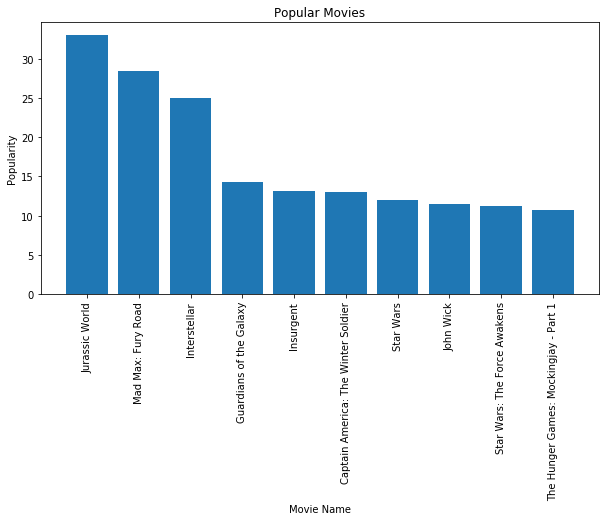

In [416]:
#Top 10 popular movies
Title_vs_popularity = movie_data.groupby("original_title")["popularity"].mean().reset_index().sort_values(by=['popularity'], inplace=False, ascending=False)
fig = plt.figure(figsize = (10, 5))
title = Title_vs_popularity["original_title"].head(10)
popularity = Title_vs_popularity["popularity"].head(10)
plt.bar(title,popularity)
plt.xlabel("Movie Name") 
plt.ylabel("Popularity") 
plt.title("Popular Movies")
plt.xticks(rotation=90)
plt.show()

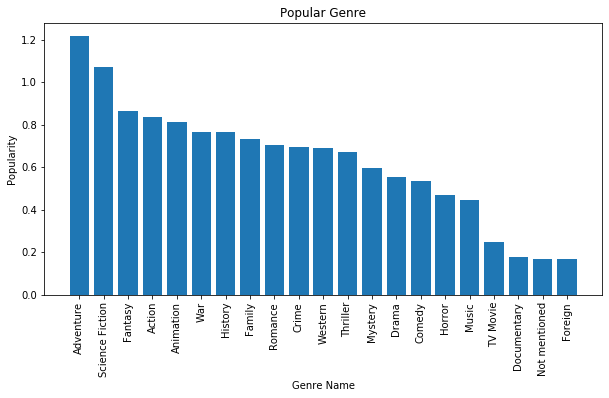

In [418]:
#Most popular genres
Genre_vs_Popularity = movie_data.groupby("Genre type_1")["popularity"].mean().reset_index().sort_values(by=['popularity'], inplace=False, ascending=False)
fig = plt.figure(figsize = (10, 5))
genre = Genre_vs_Popularity["Genre type_1"]
popularity1 = Genre_vs_Popularity["popularity"]
plt.bar(genre,popularity1)
plt.xlabel("Genre Name") 
plt.ylabel("Popularity") 
plt.title("Popular Genre")
plt.xticks(rotation=90)
plt.show()

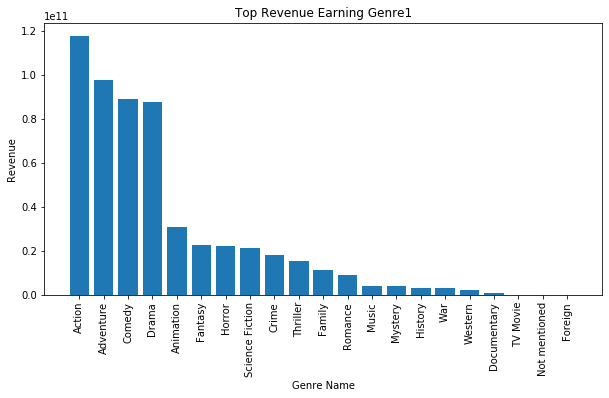

In [419]:
#Top revenue generating genretype_1
Genre_vs_Revenue = movie_data.groupby("Genre type_1")["revenue_adj"].sum().reset_index().sort_values(by=['revenue_adj'], inplace=False, ascending=False)
fig = plt.figure(figsize = (10, 5))
genre1 = Genre_vs_Revenue["Genre type_1"]
revenue1 = Genre_vs_Revenue["revenue_adj"]
plt.bar(genre1,revenue1)
plt.xlabel("Genre Name") 
plt.ylabel("Revenue") 
plt.title("Top Revenue Earning Genre1")
plt.xticks(rotation=90)
plt.show()

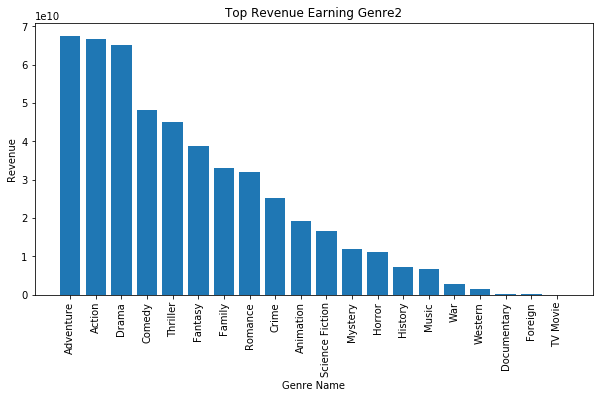

In [420]:
#Top revenue generating genretype_2
Genre2_vs_Revenue = movie_data.groupby("Genre type_2")["revenue_adj"].sum().reset_index().sort_values(by=['revenue_adj'], inplace=False, ascending=False)
Genre2_vs_Revenue.head()
fig = plt.figure(figsize = (10, 5))
genre2 = Genre2_vs_Revenue["Genre type_2"]
revenue2 = Genre2_vs_Revenue["revenue_adj"]
plt.bar(genre2,revenue2)
plt.xlabel("Genre Name") 
plt.ylabel("Revenue") 
plt.title("Top Revenue Earning Genre2")
plt.xticks(rotation=90)
plt.show()

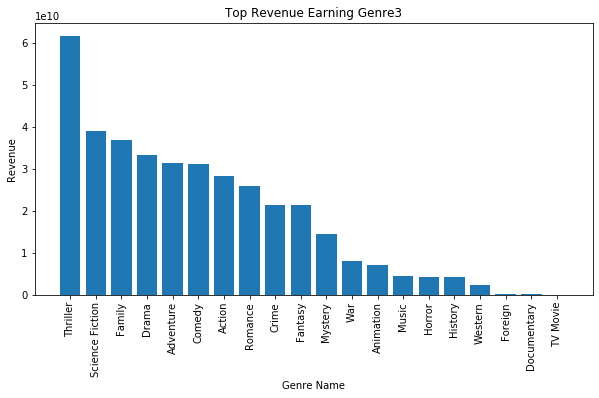

In [421]:
#Top revenue generating genretype_3
Genre3_vs_Revenue = movie_data.groupby("Genre type_3")["revenue_adj"].sum().reset_index().sort_values(by=['revenue_adj'], inplace=False, ascending=False)
Genre3_vs_Revenue.head()
fig = plt.figure(figsize = (10, 5))
genre3 = Genre3_vs_Revenue["Genre type_3"]
revenue3 = Genre3_vs_Revenue["revenue_adj"]
plt.bar(genre3,revenue3)
plt.xlabel("Genre Name") 
plt.ylabel("Revenue") 
plt.title("Top Revenue Earning Genre3")
plt.xticks(rotation=90)
plt.show()

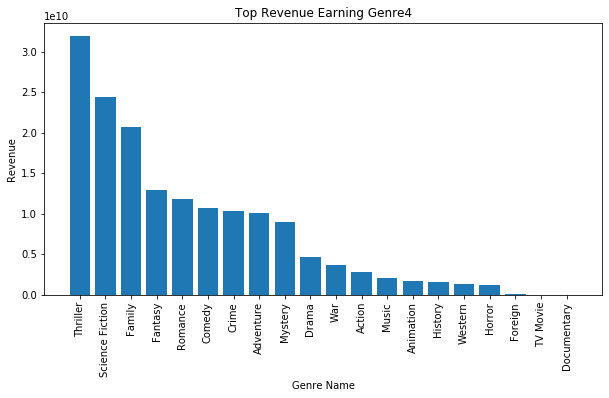

In [422]:
#Top revenue generating genretype_4
Genre4_vs_Revenue = movie_data.groupby("Genre type_4")["revenue_adj"].sum().reset_index().sort_values(by=['revenue_adj'], inplace=False, ascending=False)
Genre4_vs_Revenue.head()
fig = plt.figure(figsize = (10, 5))
genre4 = Genre4_vs_Revenue["Genre type_4"]
revenue4 = Genre4_vs_Revenue["revenue_adj"]
plt.bar(genre4,revenue4)
plt.xlabel("Genre Name") 
plt.ylabel("Revenue") 
plt.title("Top Revenue Earning Genre4")
plt.xticks(rotation=90)
plt.show()

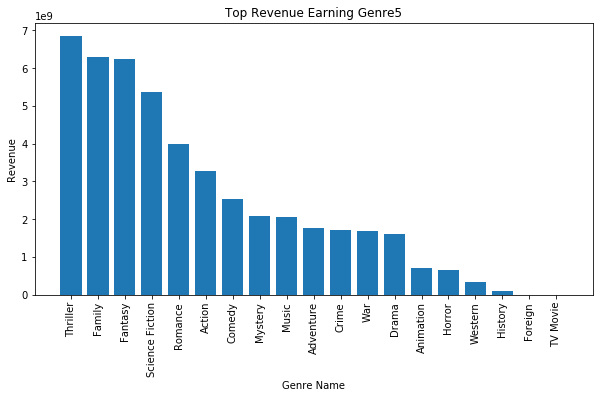

In [423]:
#Top revenue generating genretype_5
Genre5_vs_Revenue = movie_data.groupby("Genre type_5")["revenue_adj"].sum().reset_index().sort_values(by=['revenue_adj'], inplace=False, ascending=False)
Genre5_vs_Revenue.head()
fig = plt.figure(figsize = (10, 5))
genre5 = Genre5_vs_Revenue["Genre type_5"]
revenue5 = Genre5_vs_Revenue["revenue_adj"]
plt.bar(genre5,revenue5)
plt.xlabel("Genre Name") 
plt.ylabel("Revenue") 
plt.title("Top Revenue Earning Genre5")
plt.xticks(rotation=90)
plt.show()

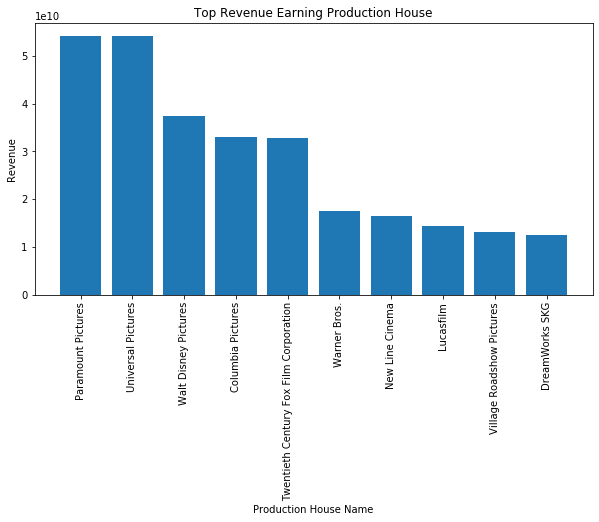

In [424]:
#Top revenue generating Production Company_1
ProductionH_vs_Revenue = movie_data.groupby("Production company_1")["revenue_adj"].sum().reset_index().sort_values(by=['revenue_adj'], inplace=False, ascending=False)
ProductionH_vs_Revenue.head()
fig = plt.figure(figsize = (10, 5))
productionH = ProductionH_vs_Revenue["Production company_1"].head(10)
revenueH = ProductionH_vs_Revenue["revenue_adj"].head(10)
plt.bar(productionH,revenueH)
plt.xlabel("Production House Name") 
plt.ylabel("Revenue") 
plt.title("Top Revenue Earning Production House")
plt.xticks(rotation=90)
plt.show()

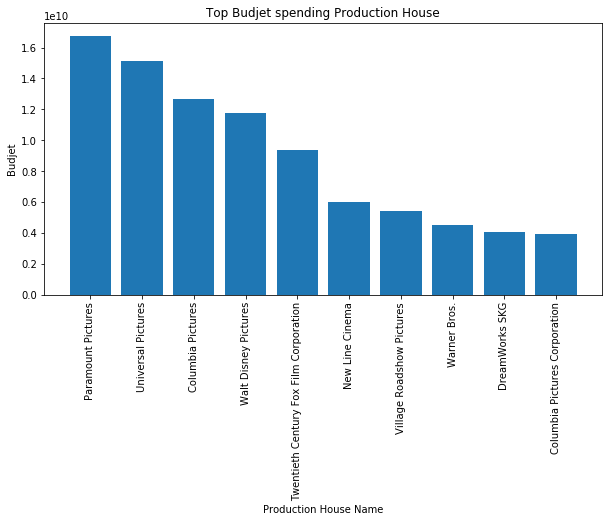

In [391]:
#Top 10 Budjet spending Production House
ProductionH_vs_Revenue = movie_data.groupby("Production company_1")["budget_adj"].sum().reset_index().sort_values(by=['budget_adj'], inplace=False, ascending=False)
ProductionH_vs_Revenue.head()
fig = plt.figure(figsize = (10, 5))
productionHB = ProductionH_vs_Revenue["Production company_1"].head(10)
budgetHB = ProductionH_vs_Revenue["budget_adj"].head(10)
plt.bar(productionHB,budgetHB)
plt.xlabel("Production House Name") 
plt.ylabel("Budjet") 
plt.title("Top Budjet spending Production House")
plt.xticks(rotation=90)
plt.show()

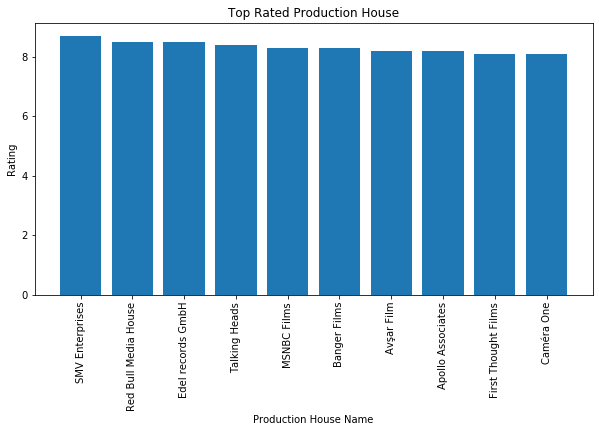

In [425]:
#Production House having Top Rated movies
ProductionH_vs_rating = movie_data.groupby("Production company_1")["vote_average"].mean().reset_index().sort_values(by=['vote_average'], inplace=False, ascending=False)
ProductionH_vs_rating.head()
fig = plt.figure(figsize = (10, 5))
productionHR = ProductionH_vs_rating["Production company_1"].head(10)
ratingHR = ProductionH_vs_rating["vote_average"].head(10)
plt.bar(productionHR,ratingHR)
plt.xlabel("Production House Name") 
plt.ylabel("Rating") 
plt.title("Top Rated Production House")
plt.xticks(rotation=90)
plt.show()

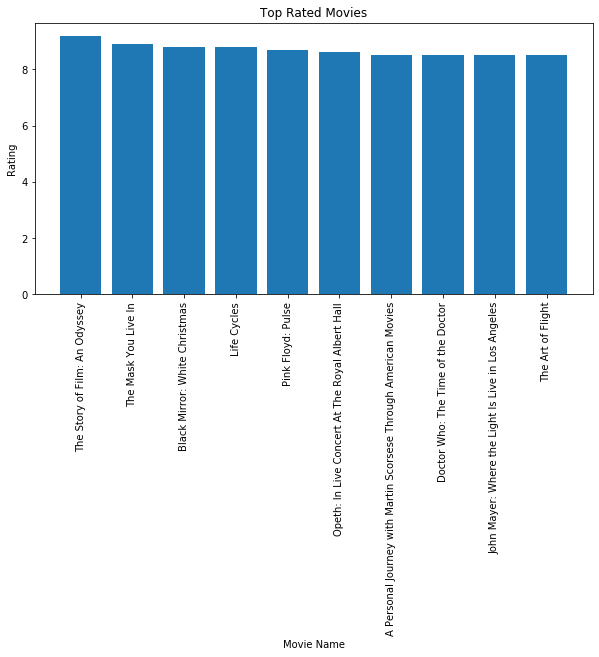

In [427]:
#Top Rated Movies
Movie_vs_rating = movie_data.groupby("original_title")["vote_average"].mean().reset_index().sort_values(by=['vote_average'], inplace=False, ascending=False)
Movie_vs_rating.head()
fig = plt.figure(figsize = (10, 5))
movieR = Movie_vs_rating["original_title"].head(10)
ratingMR = Movie_vs_rating["vote_average"].head(10)
plt.bar(movieR,ratingMR)
plt.xlabel("Movie Name") 
plt.ylabel("Rating") 
plt.title("Top Rated Movies")
plt.xticks(rotation=90)
plt.show()